In [ ]:
import tensorflow as tf
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import load_img

In [ ]:
!pip install keras

In [ ]:
from keras.models import Sequential

In [ ]:
!pip install tensorflow

In [ ]:
import cv2
video_capture = cv2.VideoCapture("http://100.126.178.27:8080/video")

In [ ]:
model.save('castNet.keras')



In [ ]:
lt = [cv2.ROTATE_180,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_90_COUNTERCLOCKWISE]
def brightness(img):
  value = random.uniform(0.5,2)
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  hsv = np.array(hsv, dtype = np.float64)
  hsv[:, :, 1] = hsv[:, :, 1]*value
  hsv[:, :, 1][hsv[:, :, 1]>255] = 255
  hsv[:, :, 2] = hsv[:, :, 2]*value
  hsv[:, :, 2][hsv[:, :, 2]>255] = 255
  hsv = np.array(hsv, dtype = np.uint8)
  img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
  return img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pathlib
import glob
directory=pathlib.Path("/content/drive/MyDrive/Casting")
resultant="/content/augmentedimages"


In [ ]:
import os
import random
import cv2
items=os.listdir(directory)
classes=[]
count=0
images=[]
labels=[]
for i in items:
  i1=0
  print(i)
  classes.append(i)
  path1=f"{directory}/{i}"
  a=random.randint(5,10)
  img=cv2.imread(path1)
  img=cv2.resize(img,(224,224))
  k=i.split(".")[0]
  cv2.imwrite(f"{resultant}\{k}{i1}.jpeg",img)
  i1+=1
  while a!=0:
    img=cv2.rotate(img,lt[random.randint(0,2)])
    images.append(img)
    cv2.imwrite(f"{resultant}\{k}{i1}.jpeg",img)
    i1+=1
    labels.append(count)
    if a%2==0:
      img=brightness(img)
      images.append(img)
      cv2.imwrite(f"{resultant}\{k}{i1}.jpeg",img)
      i1+=1
      labels.append(count)
    a-=1
  count+=1
images=np.array(images)
labels=np.array(labels)

cast_ok.jpg.jpeg
cast_def.jpg.jpeg


In [ ]:
images.shape

(19, 224, 224, 3)

In [ ]:
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import*
from keras.applications.vgg16 import VGG16, preprocess_input

In [ ]:
model = VGG16(weights="imagenet")
for i in model.layers:
  i.trainable = False

In [ ]:
len(model.layers)

23

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
transferVGG16 = Sequential()

for i in range(18):
  transferVGG16.add(model.layers[i])

transferVGG16.add(Flatten())
transferVGG16.add(Dense(512,activation="relu"))
transferVGG16.add(Dense(128,activation="relu"))
transferVGG16.add(Dense(15,activation="Softmax"))

transferVGG16.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print("call")
        if (logs.get('accuracy') > 0.99):
            print("\nReached 99.00%% accuracy, so stopping training!!")
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
transferVGG16.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
transferVGG16.fit(images,labels,epochs=100,callbacks=[callbacks])
transferVGG16.evaluate(images,labels)

Epoch 1/100
1/1 [==============================] - 25s 25s/step - loss: 19.3214 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 14s 14s/step - loss: 21.8650 - accuracy: 0.6316
Epoch 3/100
1/1 [==============================] - 11s 11s/step - loss: 131.3607 - accuracy: 0.3684
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000call

Reached 99.00%% accuracy, so stopping training!!
1/1 [==============================] - 11s 11s/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [ ]:
transferVGG16.evaluate(images,labels)

1/1 [==============================] - 11s 11s/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [ ]:
def predict(i,transferVGG16,labels):
  path1=f"{directory}/{i}"
  img=cv2.imread(path1)
  img=cv2.resize(img,(224,224))
  a=np.argmax(transferVGG16.predict(np.array([img])))
  img=cv2.putText(img,labels[a],(25,25),cv2.FONT_HERSHEY_SIMPLEX,1,(225,225,0),3,cv2.LINE_AA)
  plt.imshow(img)

1/1 [==============================] - 1s 621ms/step


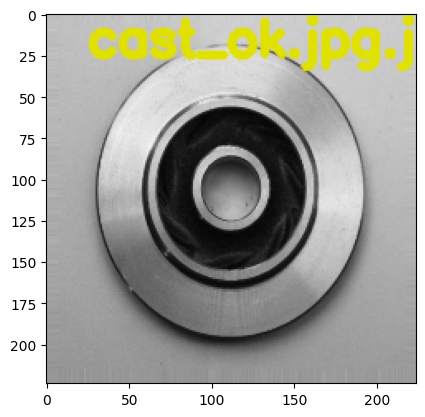

In [ ]:
predict("cast_ok.jpg.jpeg",transferVGG16,classes)

1/1 [==============================] - 1s 520ms/step


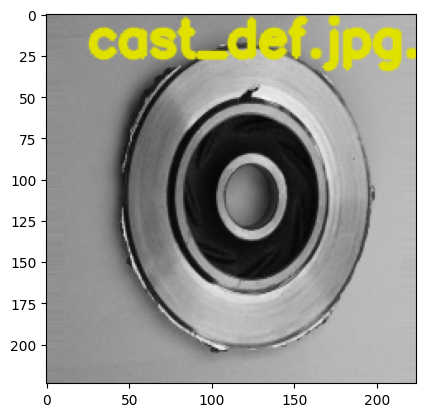

In [ ]:
predict("cast_def.jpg.jpeg",transferVGG16,classes)